In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
df = pd.read_csv('Rating organization comparison - Validi.csv')
df


,Nome,Pagina web,Paywall,Url dataset,Tipologia,Scaladi output di reputabilità,Criteri automatizzabili,Metodologia di stima della reputabilità,Criteri STRUTTURATI per la stima della reputabilità,Provenienza dati,Altre informazioni,Risorse utili
0,Newsguard,https://www.newsguardtech.com/,Sì,NaN,Società,100,Regularly corrects or clarifies errors\n\nWebs...,Annotatori e parametri struttrati,Does not repeatedly publish false content\nGat...,Propri,Articolo Marinella e Manuel,NaN
1,Ground News,https://ground.news/,Sì,NaN,Società,100,"Si, perché lo fa un algoritmo",Algoritmo,Calcolata con un algoritmo dai dati provenient...,Derivati,NaN,NaN
2,Ad Fontes Media (AFM),https://adfontesmedia.com/,Sì,NaN,Società,100,No,Annotatori e parametri struttrati,La metodologia di stima della reputabilità del...,Propri,NaN,NaN
3,Media Bias/Fact Check,https://mediabiasfactcheck.com/,No,https://mediabiasfactcheck.com/,Società,100,Traffic/Longevity:\n High Traffic: 2 points\...,Annotatori e parametri struttrati,Factual Reporting:\nVery High: 4 points\nHigh:...,Propri,NaN,NaN
4,GDI,https://www.disinformationindex.org/,Sì,NaN,Società,100,Attribution\nComment policies \nFunding\nOwner...,Annotatori e parametri struttrati,Headline accuracy\nLede present\nByline inform...,Propri,Articolo Marinella e Manuel,NaN
5,Wikipedia,https://wikipedia.org/,No,https://en.wikipedia.org/wiki/Wikipedia:Reliab...,Organizzazione senza scopo di lucro,5,No,Utenti non specializzati,No,Propri,"""Frequenza delle discussioni: Le fonti dell'el...",NaN
6,Creddler,http://creddle.io/,No,https://credder.com/,Società,100,No,Annotatori professionali e utenti non speciali...,"Credible --> Investigative, Balanced, Well Sou...",Propri,NaN,NaN
7,Poly Fact,https://www.politifact.com/,No,https://e.infogr.am/politifacts_fake_news_alma...,Organizzazione senza scopo di lucro,4,No,Giornalisti,No,Propri,Articolo di giornale dedicato,NaN
8,Butac,https://www.butac.it/,No,https://github.com/flodd/butac_black_list/tree...,Sito web / Blog,1,No,Giornalisti e utenti non specializzati,No,Propri,"Articolo all'interno del sito: ""L’idea è di ag...",NaN
9,Bufale,https://www.bufale.net/,No,https://www.bufale.net/the-black-list-la-lista...,Sito web / Blog,1,No,Giornalisti e utenti non specializzati,No,Propri,"Articolo di giornale dedicato ""Come promesso, ...",NaN


In [65]:
df = df.drop(columns=['Pagina web', 'Url dataset','Altre informazioni','Risorse utili'])

df.loc[df['Criteri automatizzabili'] != 'No', 'Criteri automatizzabili',] = 'Sì'
df.loc[df['Criteri STRUTTURATI per la stima della reputabilità'] != 'No', 'Criteri STRUTTURATI per la stima della reputabilità',] = 'Sì'

df

,Nome,Paywall,Tipologia,Scaladi output di reputabilità,Criteri automatizzabili,Metodologia di stima della reputabilità,Criteri STRUTTURATI per la stima della reputabilità,Provenienza dati
0,Newsguard,Sì,Società,100,Sì,Annotatori e parametri struttrati,Sì,Propri
1,Ground News,Sì,Società,100,Sì,Algoritmo,Sì,Derivati
2,Ad Fontes Media (AFM),Sì,Società,100,No,Annotatori e parametri struttrati,Sì,Propri
3,Media Bias/Fact Check,No,Società,100,Sì,Annotatori e parametri struttrati,Sì,Propri
4,GDI,Sì,Società,100,Sì,Annotatori e parametri struttrati,Sì,Propri
5,Wikipedia,No,Organizzazione senza scopo di lucro,5,No,Utenti non specializzati,No,Propri
6,Creddler,No,Società,100,No,Annotatori professionali e utenti non speciali...,Sì,Propri
7,Poly Fact,No,Organizzazione senza scopo di lucro,4,No,Giornalisti,No,Propri
8,Butac,No,Sito web / Blog,1,No,Giornalisti e utenti non specializzati,No,Propri
9,Bufale,No,Sito web / Blog,1,No,Giornalisti e utenti non specializzati,No,Propri


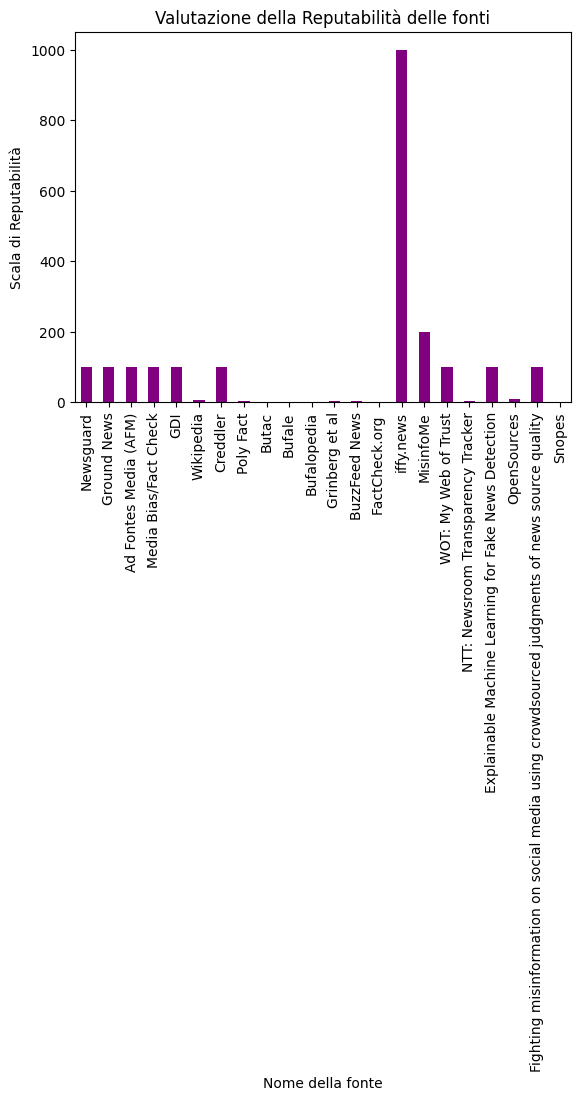

In [66]:
# 3. Valutazione della Reputabilità delle fonti
reputazione_plot = df.plot(x='Nome', y='Scaladi output di reputabilità', kind='bar', legend=False, color='purple')
plt.title('Valutazione della Reputabilità delle fonti')
plt.xlabel('Nome della fonte')
plt.ylabel('Scala di Reputabilità')
plt.show()


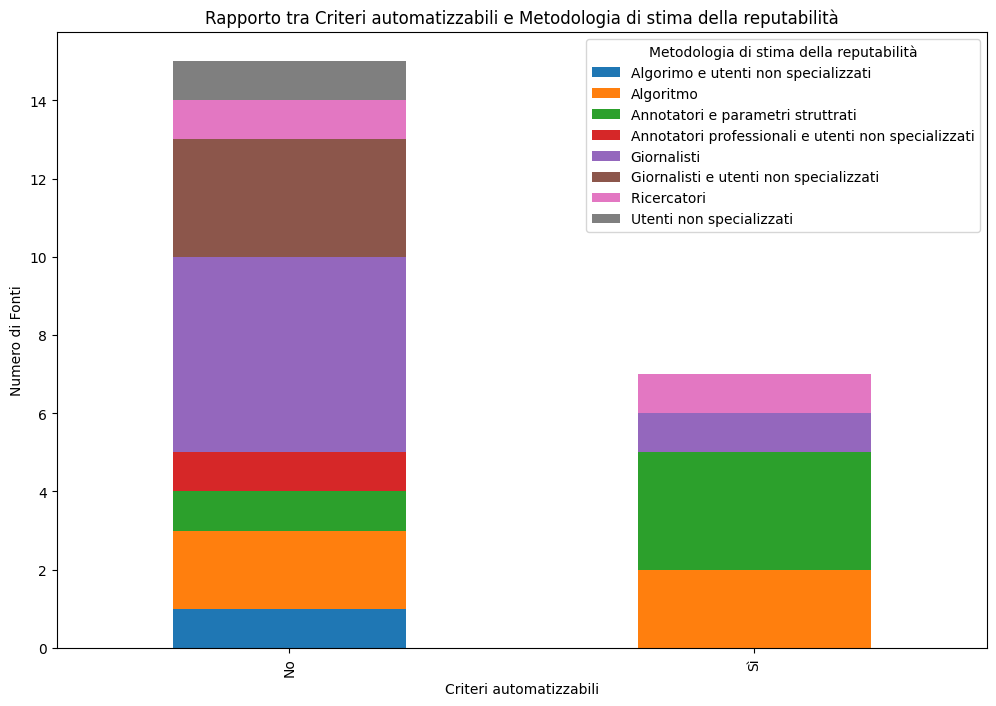

In [67]:

# Conteggio delle combinazioni di Criteri automatizzabili e Metodologia di stima della reputabilità
combinazioni = df.groupby(["Criteri automatizzabili", "Metodologia di stima della reputabilità"]).size().unstack()

# Creazione del grafico a barre impilato
combinazioni.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Criteri automatizzabili')
plt.ylabel('Numero di Fonti')
plt.title('Rapporto tra Criteri automatizzabili e Metodologia di stima della reputabilità')
plt.legend(title='Metodologia di stima della reputabilità')
plt.show()


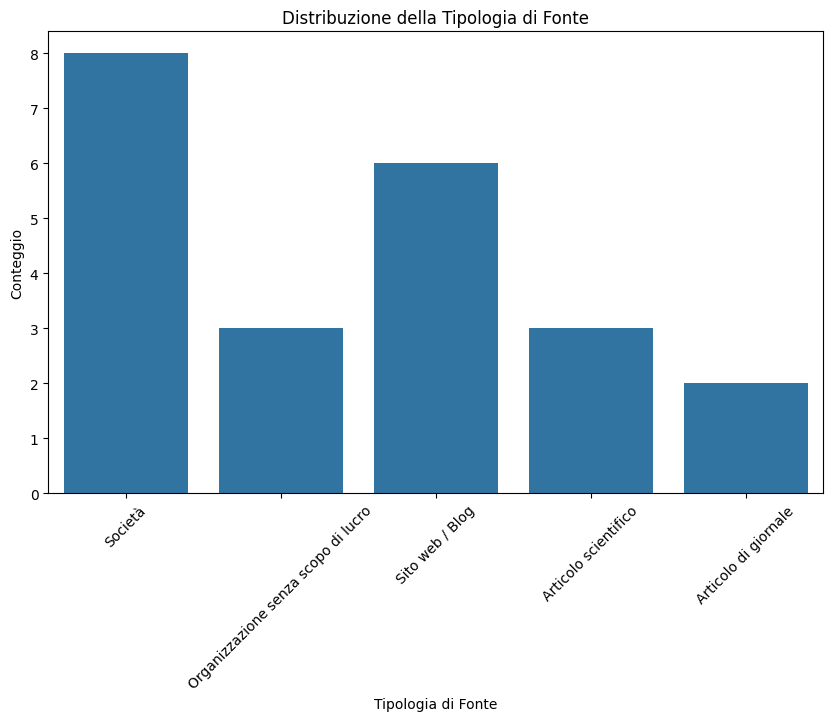

In [68]:
# Grafico a barre per la tipologia di fonte
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipologia', data=df)
plt.title('Distribuzione della Tipologia di Fonte')
plt.xlabel('Tipologia di Fonte')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()


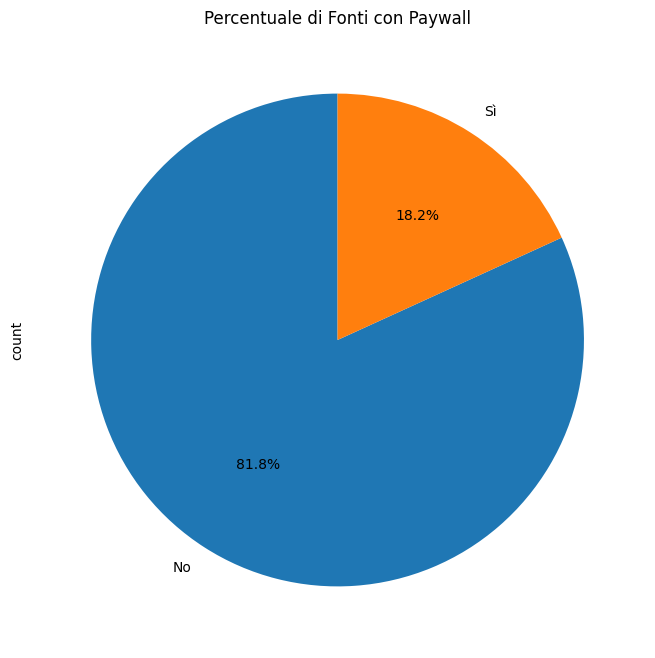

In [69]:
# Grafico a torta per il paywall
plt.figure(figsize=(8, 8))
df['Paywall'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentuale di Fonti con Paywall')
plt.show()


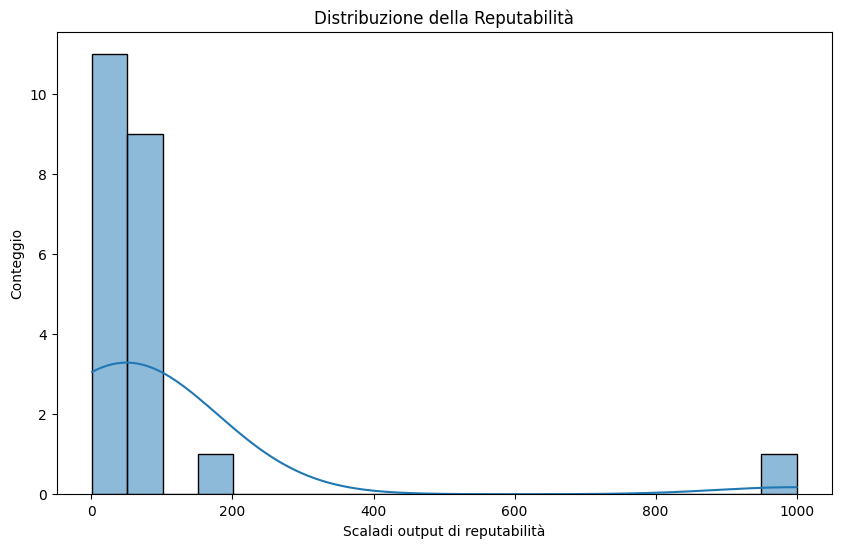

In [70]:
# Grafico a barre per la reputabilità
plt.figure(figsize=(10, 6))
sns.histplot(df['Scaladi output di reputabilità'], bins=20, kde=True)
plt.title('Distribuzione della Reputabilità')
plt.xlabel('Scaladi output di reputabilità')
plt.ylabel('Conteggio')
plt.show()
